In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import matplotlib.font_manager as fm

# Find and select a specific font family
font_family = 'serif'
font_path = fm.findfont(fm.FontProperties(family=font_family))

In [23]:
sns.set_theme()

In [24]:
time_homemade = pd.read_csv('time_homemade.dat', delimiter='\t',names=["rank", "size","n1","n2","n3","dt", "iterations","time"])#[-27:-1]
time_fftw3_mpi = pd.read_csv('time_fftw3_mpi.dat', delimiter='\t',names=["rank", "size","n1","n2","n3","dt", "iterations","time"])#[-26:]

In [29]:
time_homemade

,rank,size,n1,n2,n3,dt,iterations,time
0,0,1,40,40,80,0.001,100,0.288780
1,0,1,40,40,80,0.010,100,0.290476
2,0,1,40,40,80,0.001,500,1.206316
3,0,1,80,80,160,0.001,100,2.641544
4,0,1,160,160,240,0.001,100,17.296053
...,...,...,...,...,...,...,...,...
250,7,10,80,80,160,0.001,1000,2.364430
251,1,10,80,80,160,0.001,1000,2.363779
252,9,10,80,80,160,0.001,1000,2.364370
253,0,10,80,80,160,0.001,1000,2.364410


In [25]:
time_homemade_mean = [np.mean([time_homemade["time"].iloc[i] for i in range(len(time_homemade)) 
     if np.logical_and(time_homemade["size"].iloc[i]==j, time_homemade["n1"].iloc[i]==80)]) 
                        for j in [1,2,5,8,10]]
time_fftw3_mpi_mean = [np.mean(
    [time_fftw3_mpi["time"].iloc[i] for i in range(len(time_fftw3_mpi)) 
     if np.logical_and(time_fftw3_mpi["size"].iloc[i]==j, time_fftw3_mpi["n1"].iloc[i]==80)]) 
                        for j in [1,2,5,8,10]]

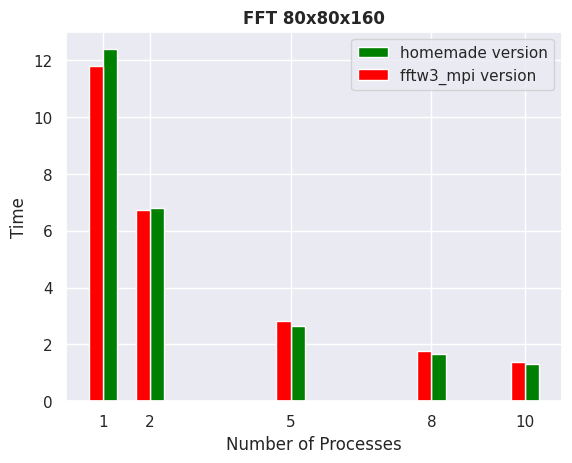

In [32]:
width=0.3
plt.bar([1+width/2,2+width/2,5+width/2,8+width/2,10+width/2],time_homemade_mean, color="green", label="homemade version", width=width,)
plt.bar([1-width/2,2-width/2,5-width/2,8-width/2,10-width/2],time_fftw3_mpi_mean, color="red",label="fftw3_mpi version", width=width)
plt.xticks([1,2,5,8,10])
plt.legend()
plt.title(f"FFT 80x80x160",fontweight='bold')
plt.xlabel("Number of Processes",fontweight=500)
plt.ylabel("Time",fontweight=500)
plt.savefig(f"FFT_80_80_160.png")